In [1]:
# SEM Analysis

import pandas as pd, plspm.config as c
from plspm.plspm import Plspm
from plspm.scheme import Scheme
from plspm.mode import Mode

UTAUT2 = pd.read_csv('UTAUT2.csv', index_col=0)

# Establish relationships between constructs
structure = c.Structure()
structure.add_path(["PE", "EE", "SI", "HM", "HA"], ["BI"])

# Establish relationships between manifest and latent variables (the constructs)
config = c.Config(structure.path(), scaled=False)
config.add_lv_with_columns_named("PE", Mode.A, UTAUT2, "PE")
config.add_lv_with_columns_named("EE", Mode.A, UTAUT2, "EE")
config.add_lv_with_columns_named("SI", Mode.A, UTAUT2, "SI")
config.add_lv_with_columns_named("HM", Mode.A, UTAUT2, "HM")
config.add_lv_with_columns_named("HA", Mode.A, UTAUT2, "HA")
config.add_lv_with_columns_named("BI", Mode.A, UTAUT2, "BI")

# Check that the data are quantitative metric scale type
print(config.metric())

# Estimate the path model, using the Partial Least Squares (PLS) algorithm
plspm_calc = Plspm(UTAUT2, config, Scheme.PATH, bootstrap=True, bootstrap_iterations=5000)

# Visualize results
print(plspm_calc.goodness_of_fit())
print(plspm_calc.unidimensionality())
print(plspm_calc.inner_summary())
print(plspm_calc.crossloadings())
print(plspm_calc.outer_model())
print(plspm_calc.inner_model())
print(plspm_calc.path_coefficients())
print(plspm_calc.effects())
print(plspm_calc.scores())


True


C:\Users\sainz\anaconda3\lib\site-packages\plspm\inner_model.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.__summaries = self.__summaries.append(_summary(dv, regression)).reset_index(drop=True)
C:\Users\sainz\anaconda3\lib\site-packages\plspm\inner_model.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  effects = effects.append(effect)
C:\Users\sainz\anaconda3\lib\site-packages\plspm\inner_model.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  effects = effects.append(effect)
C:\Users\sainz\anaconda3\lib\site-packages\plspm\inner_model.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  effects = effects.append(effec

0.7022970471003227
   mode  mvs  cronbach_alpha  dillon_goldstein_rho   eig_1st   eig_2nd
HA    A  4.0        0.903868              0.932804  3.105439  0.423263
HM    A  3.0        0.928874              0.954741  2.626494  0.208944
SI    A  3.0        0.917182              0.947689  2.573812  0.236167
EE    A  4.0        0.929851              0.950050  3.305037  0.295968
PE    A  4.0        0.878477              0.917047  2.940003  0.518905
BI    A  3.0        0.944848              0.964547  2.702062  0.171593
          type  r_squared  r_squared_adj  block_communality  mean_redundancy  \
BI  Endogenous   0.600923        0.59582           0.900477         0.541118   
EE   Exogenous   0.000000        0.00000           0.826194         0.000000   
HA   Exogenous   0.000000        0.00000           0.774418         0.000000   
HM   Exogenous   0.000000        0.00000           0.875372         0.000000   
PE   Exogenous   0.000000        0.00000           0.733475         0.000000   
SI  

In [2]:
# Perform Common Method Bias (CMB) test

import numpy as np
import pandas as pd
from scipy.stats import f

df=plspm_calc.crossloadings()

# Calculate the correlation matrix between the observed variables using the crossloadings
corr_matrix = df.corr()

# Calculate the principal components of the correlation matrix
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
first_component = eigenvectors[:, 0]

# Calculate the loading of each manifest variable in the first principal component
loadings = np.abs(df @ first_component)

# Calculate the proportion of total variance explained by the first principal component
total_variance = np.sum(eigenvalues)
explained_variance = eigenvalues[0]
explained_variance_ratio = explained_variance / total_variance

print(f"The first component explains {explained_variance_ratio * 100:.2f}% of the total variance")


The first component explains 52.50% of the total variance


In [3]:
# Elimination of unsupported hypotheses

import pandas as pd, plspm.config as c
from plspm.plspm import Plspm
from plspm.scheme import Scheme
from plspm.mode import Mode

UTAUT2 = pd.read_csv('UTAUT2.csv', index_col=0)

# Establish relationships between constructs
structure = c.Structure()
structure.add_path(["PE", "EE", "SI", "HA"], ["BI"])

# Establish relationships between manifest and latent variables (the constructs)
config = c.Config(structure.path(), scaled=False)
config.add_lv_with_columns_named("PE", Mode.A, UTAUT2, "PE")
config.add_lv_with_columns_named("EE", Mode.A, UTAUT2, "EE")
config.add_lv_with_columns_named("SI", Mode.A, UTAUT2, "SI")
config.add_lv_with_columns_named("HA", Mode.A, UTAUT2, "HA")
config.add_lv_with_columns_named("BI", Mode.A, UTAUT2, "BI")

# Estimate the path model, using the Partial Least Squares (PLS) algorithm
plspm_calc = Plspm(UTAUT2, config, Scheme.PATH, bootstrap=True, bootstrap_iterations=5000)

# Visualize results
print(plspm_calc.goodness_of_fit())
print(plspm_calc.unidimensionality())
print(plspm_calc.inner_summary())
print(plspm_calc.crossloadings())
print(plspm_calc.outer_model())
print(plspm_calc.inner_model())
print(plspm_calc.path_coefficients())
print(plspm_calc.effects())
print(plspm_calc.scores())


True


C:\Users\sainz\anaconda3\lib\site-packages\plspm\inner_model.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.__summaries = self.__summaries.append(_summary(dv, regression)).reset_index(drop=True)
C:\Users\sainz\anaconda3\lib\site-packages\plspm\inner_model.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  effects = effects.append(effect)
C:\Users\sainz\anaconda3\lib\site-packages\plspm\inner_model.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  effects = effects.append(effect)
C:\Users\sainz\anaconda3\lib\site-packages\plspm\inner_model.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  effects = effects.append(effec

0.6977842862719427
   mode  mvs  cronbach_alpha  dillon_goldstein_rho   eig_1st   eig_2nd
HA    A  4.0        0.903868              0.932804  3.105439  0.423263
SI    A  3.0        0.917182              0.947689  2.573812  0.236167
EE    A  4.0        0.929851              0.950050  3.305037  0.295968
PE    A  4.0        0.878477              0.917047  2.940003  0.518905
BI    A  3.0        0.944848              0.964547  2.702062  0.171593
          type  r_squared  r_squared_adj  block_communality  mean_redundancy  \
BI  Endogenous   0.599877       0.595794           0.900474         0.540173   
EE   Exogenous   0.000000       0.000000           0.826194         0.000000   
HA   Exogenous   0.000000       0.000000           0.774418         0.000000   
PE   Exogenous   0.000000       0.000000           0.733475         0.000000   
SI   Exogenous   0.000000       0.000000           0.857440         0.000000   

         ave  
BI  0.900474  
EE  0.826194  
HA  0.774418  
PE  0.733475  

In [4]:
# Create the dataset with the values of the constructs for each record (each surveyed person)
plspm_calc.scores().to_csv('UTAUT2_constructs.csv', index=False)

In [46]:
# Normalize the data in the range [0, 1]

import pandas as pd

# Read CSV file with original data
df = pd.read_csv('UTAUT2_constructs.csv')

# Normalize the data in each column
for col in df.columns:
    X_min = df[col].min()
    X_max = df[col].max()
    df[col] = (df[col] - X_min) / (X_max - X_min)

# Write CSV file with normalized data
df.to_csv('UTAUT2_normalized_constructs.csv', index=False)


Fold 1
12/12 [==============================] - 0s 729us/step
RMSE train: 0.10779
R2 train: 0.59829
RMSE test: 0.10773
R2 test: 0.42342

Importancia relativa de cada predictor de entrada:
 [0.7551587  0.0740319  0.34671032 0.4155543 ]


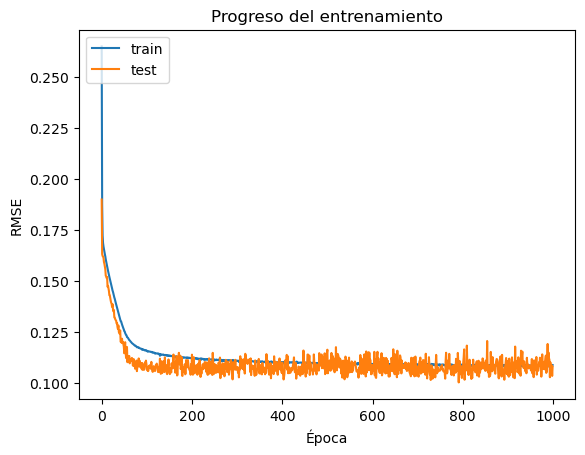

Fold 2
12/12 [==============================] - 0s 725us/step
RMSE train: 0.10512
R2 train: 0.60185
RMSE test: 0.13270
R2 test: 0.51518

Importancia relativa de cada predictor de entrada:
 [0.77461225 0.09629605 0.37212583 0.3499612 ]


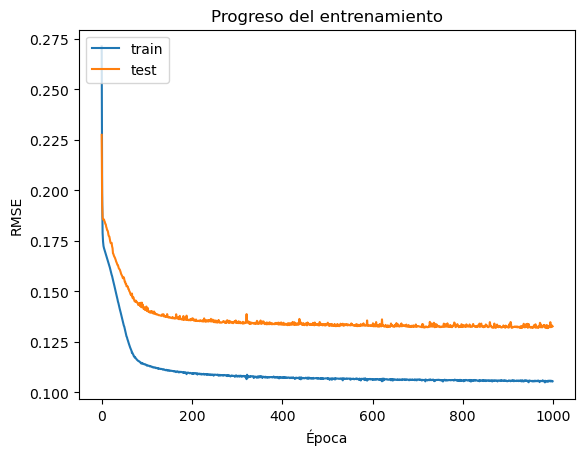

Fold 3
12/12 [==============================] - 0s 816us/step
RMSE train: 0.10709
R2 train: 0.57729
RMSE test: 0.11677
R2 test: 0.66813

Importancia relativa de cada predictor de entrada:
 [0.7499407  0.07191848 0.36768913 0.4165336 ]


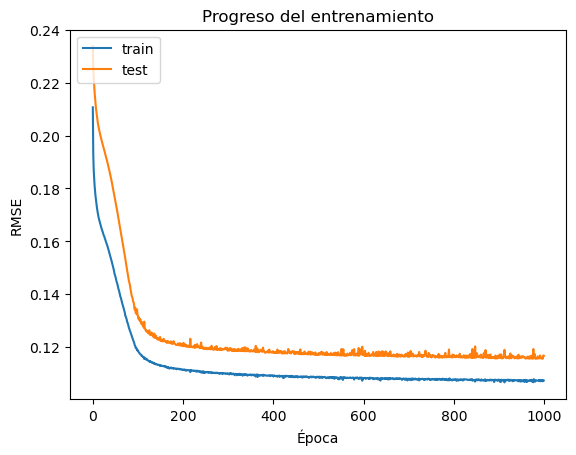

Fold 4
12/12 [==============================] - 0s 637us/step
RMSE train: 0.11048
R2 train: 0.56599
RMSE test: 0.08602
R2 test: 0.73625

Importancia relativa de cada predictor de entrada:
 [0.7319128  0.1457555  0.35251775 0.4045774 ]


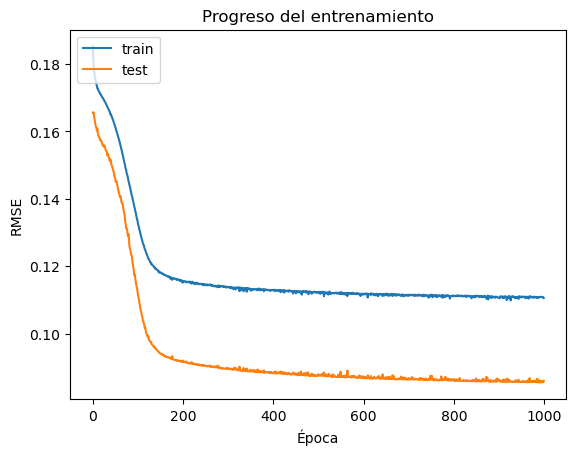

Fold 5
12/12 [==============================] - 0s 723us/step
RMSE train: 0.10800
R2 train: 0.59035
RMSE test: 0.10520
R2 test: 0.57174

Importancia relativa de cada predictor de entrada:
 [0.7741919  0.0479511  0.31072474 0.38257805]


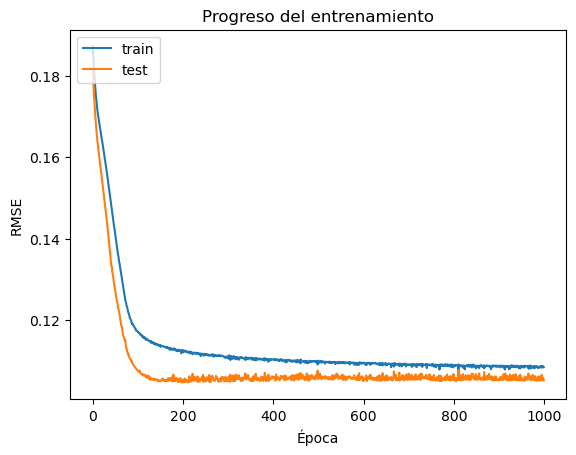

Fold 6
12/12 [==============================] - 0s 725us/step
RMSE train: 0.10569
R2 train: 0.58354
RMSE test: 0.12822
R2 test: 0.57698

Importancia relativa de cada predictor de entrada:
 [0.7134388  0.15945369 0.36391988 0.44087163]


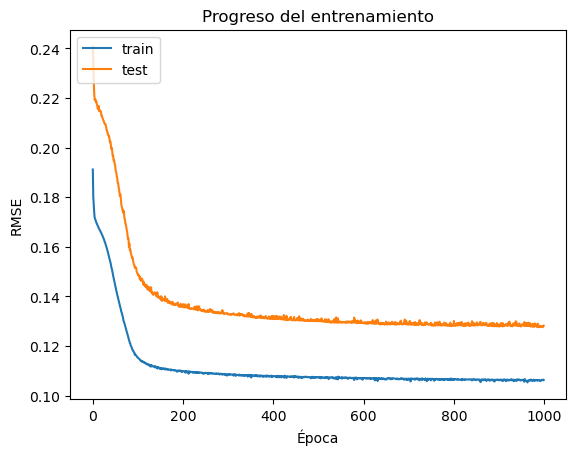

Fold 7
12/12 [==============================] - 0s 725us/step
RMSE train: 0.10965
R2 train: 0.60162
RMSE test: 0.10322
R2 test: 0.50621

Importancia relativa de cada predictor de entrada:
 [0.7384415  0.13868257 0.3647742  0.41723457]


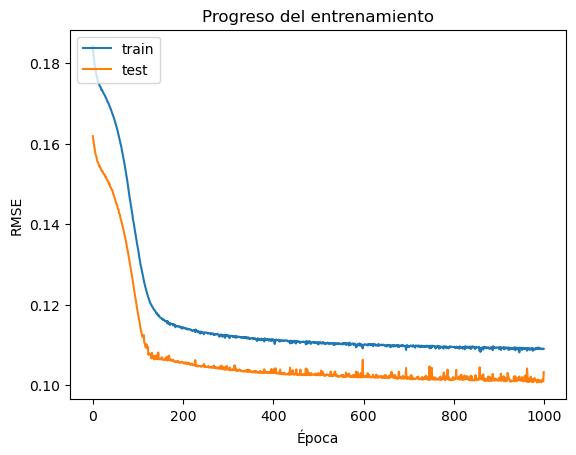

Fold 8
12/12 [==============================] - 0s 722us/step
RMSE train: 0.10912
R2 train: 0.57883
RMSE test: 0.09538
R2 test: 0.67329

Importancia relativa de cada predictor de entrada:
 [0.7683721  0.11296177 0.3736329  0.38683763]


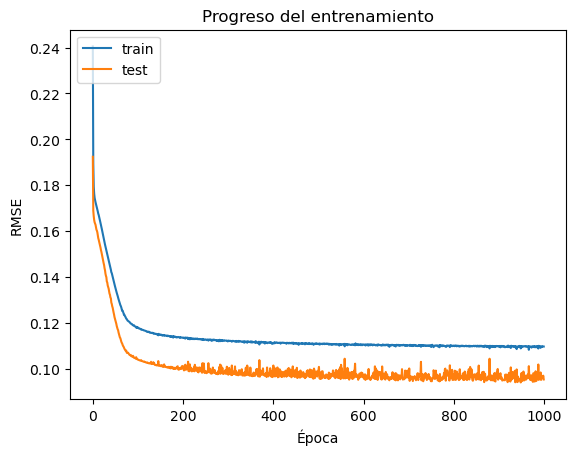

Fold 9
12/12 [==============================] - 0s 727us/step
RMSE train: 0.10868
R2 train: 0.57595
RMSE test: 0.10199
R2 test: 0.60631

Importancia relativa de cada predictor de entrada:
 [0.71549034 0.13092178 0.41101635 0.36357865]


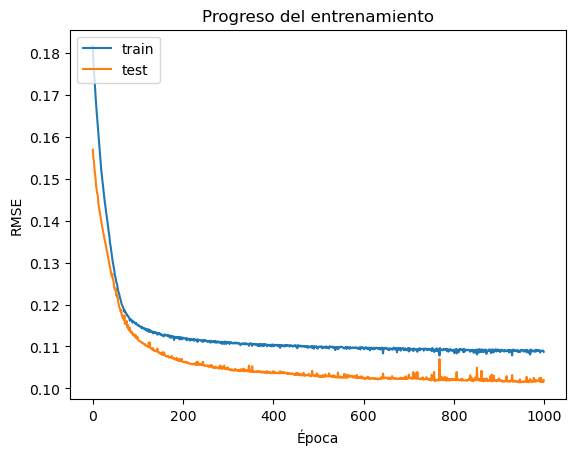

Fold 10
12/12 [==============================] - 0s 725us/step
RMSE train: 0.10762
R2 train: 0.61291
RMSE test: 0.12482
R2 test: 0.40454

Importancia relativa de cada predictor de entrada:
 [0.7354991  0.14727959 0.3829724  0.36552557]


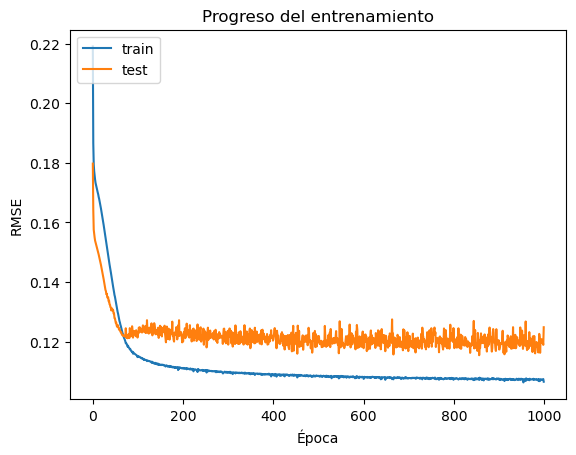

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 3)                 15        
                                                                 
 dense_25 (Dense)            (None, 1)                 4         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
RMSE train promedio: 0.10792 +/- 0.00159
RMSE test promedio: 0.11020 +/- 0.01428
R2 train promedio: 0.58866
R2 test promedio: 0.56821

Resultados de cada fold:
    RMSE test   R2 test  RMSE train  R2 train
0   0.107734  0.423423    0.107787  0.598287
1   0.132696  0.515178    0.105115  0.601845
2   0.116765  0.668131    0.107093  0.577286
3   0.086017  0.736253    0.110482  0.565990
4   0.105202  0.571739  

In [3]:
# ANN Analysis: BI construct prediction and sensitivity analysis

import pandas as pd
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import tensorflow as tf

# Define custom RMSE loss function
def rmse_loss(y_true, y_pred):
    mse = tf.keras.losses.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    return rmse

# Load data from CSV file: columns of constructs not related to BI have been removed
data = pd.read_csv('UTAUT2_normalized_constructs.csv')

# Split data into inputs (X) and output (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values

# Define the number of folds for cross validation and the lists for storing the results of each fold
n_folds = 10
rmse_test_list = []
rmse_train_list = []
r2_test_list = []
r2_train_list=[]
importance_list = []

# Create KFold instance
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Iterate on each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    
    print(f"Fold {fold + 1}")
    
    # Splitting data into training and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the neural network
    model = Sequential()
    model.add(Dense(3, input_dim=4, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(loss=rmse_loss, optimizer=optimizers.RMSprop(learning_rate=0.001))

    # Training of the model
    history = model.fit(X_train, y_train, epochs=1000, batch_size=2, verbose=0, validation_data=(X_test, y_test))

    # Obtain model predictions
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Evaluate the model in the train set
    rmse_train = model.evaluate(X_train, y_train, verbose=0)
    rmse_train_list.append(rmse_train)
    print(f"RMSE train: {rmse_train:.5f}")
    r2_train = r2_score(y_train, y_pred_train)
    r2_train_list.append(r2_train)
    print(f"R2 train: {r2_train:.5f}")
    
    # Evaluate the model in the test set
    rmse_test = model.evaluate(X_test, y_test, verbose=0)
    rmse_test_list.append(rmse_test)
    print(f"RMSE test: {rmse_test:.5f}")
    r2_test = r2_score(y_test, y_pred)
    r2_test_list.append(r2_test)
    print(f"R2 test: {r2_test:.5f}")

    # Calculate the relative importance of each input predictor
    layer = model.layers[0]
    weights = layer.get_weights()
    importance = np.abs(weights[0])
    importance_avg = np.mean(importance, axis=1)
    importance_list.append(importance_avg)
    print()
    print("Importancia relativa de cada predictor de entrada:\n", importance_avg)
        
    # Visualize the training
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Progreso del entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('RMSE')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Visualize the neural network
plot_model(model, to_file='UTAUT2_model.png', show_shapes=True, show_layer_names=True)
print(model.summary())
    
# Calculate mean RMSE and standard deviation
rmse_train_mean = np.mean(rmse_train_list)
rmse_train_std = np.std(rmse_train_list)
print(f"RMSE train promedio: {rmse_train_mean:.5f} +/- {rmse_train_std:.5f}")
rmse_test_mean = np.mean(rmse_test_list)
rmse_test_std = np.std(rmse_test_list)
print(f"RMSE test promedio: {rmse_test_mean:.5f} +/- {rmse_test_std:.5f}")

# Calculate mean R2
r2_train_mean = np.mean(r2_train_list)
print(f"R2 train promedio: {r2_train_mean:.5f}")
r2_test_mean = np.mean(r2_test_list)
print(f"R2 test promedio: {r2_test_mean:.5f}")

# Display summary table and export it to csv
print()
results_df = pd.DataFrame({"RMSE test": rmse_test_list, "R2 test": r2_test_list,"RMSE train": rmse_train_list, "R2 train": r2_train_list})
print("Resultados de cada fold:\n", results_df)
results_df.to_csv("Results_UTAUT2.csv", index=True)
print()

# Calculate the mean relative importance of each input predictor
print()
importance_df = pd.DataFrame(importance_list, columns=data.columns[:-1])
importance_mean = importance_df.mean()

# Display summary table of relative importance and export it to csv
print("Importancia relativa de cada predictor de entrada para cada fold:\n", importance_df)
print()
print("Importancia relativa promedio de cada predictor de entrada:")
print(importance_mean)
importance_df.to_csv("Sensitivity_analysis_UTAUT2.csv", index=True)
